In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [6]:


event_frames = []
rec_frames = []
for day in range(1,28):
    event = pd.read_csv('/scratch-striped/mnanne/CSV/events/event_%d.csv' % day, delimiter='\t')
    rec = pd.read_csv('/scratch-striped/mnanne/CSV/recs/rec_%d_csv.gz' % day, delimiter='\t', compression='gzip')
    
    event_frames.append(event)
    rec_frames.append(rec)


/home/mnanne/Masterscriptie/newsreel-offline/recenv/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [100]:
print(event_1.columns)

Index(['BROWSER', 'ISP', 'OS', 'GEO_USER', 'TIME_WEEKDAY', 'POSITION',
       'DO_NOT_TRACK', 'WIDGET_KIND', 'WEATHER', 'GEO_PUBLISHER', 'LANG_USER',
       'POSITION_IN_WIDGET', 'SUBID', 'TIME_TO_ACTION', 'WIDGET_PAGE',
       'GEO_USER_ZIP', 'TIME_HOUR', 'USER_PUBLISHER_IMPRESSION', 'ITEM_SOURCE',
       'RETARGETING', 'PUBLISHER', 'USER_CAMPAIGN_IMPRESSION', 'SSP',
       'PIXEL_3RD_PARTY', 'GEO_USER_RADIUS', 'REDUCED_BID', 'ADBLOCKER',
       'BID_CPM', 'RELEASE', 'PRESENTDAY', 'WIDGET_ID', 'DIMENSION_SCREEN',
       'CONTEST_TEAM', 'ITEM_STATUS', 'PIXEL_4TH_PARTY', 'PUBLISHER_REFEER',
       'SSP_PUBLISHERID', 'DEVICE_TYPE', 'GEO_TYPE', 'TIME_MINUTE_30', 'CPO',
       'FILTER_ALLOWOSR', 'URL', 'SSP_QUALIFIER', 'SSP_NETWORK',
       'BROWSER_3RD_PARTY_SUPPORT', 'USER_COOKIE', 'TRANSPORT_PROTOCOL',
       'GENDER', 'AGE', 'INCOME', 'KEYWORD', 'ITEM_AGE', 'PUBLISHER_FILTER',
       'CHANNEL', 'CATEGORY', 'CATEGORY_SEM', 'CHANNEL_SEM', 'recs',
       'timestamp', 'type'],
      dtype=

In [98]:
print(len(event_1.columns))

60


In [103]:
event_1 = pd.concat(event_frames)
rec_1 = pd.concat(rec_frames)

In [7]:
for i in range(0, len(event_frames)):
    event_frames[i].to_pickle('/scratch-striped/mnanne/event_%d_pickled' % i)
    rec_frames[i].to_pickle('/scratch-striped/mnanne/rec_%d_pickled' % i)

In [104]:
event_1.to_pickle('/scratch-striped/mnanne/events_pickled')

In [105]:
rec_1.to_pickle('/scratch-striped/mnanne/recs_pickled')

In [3]:
event_1 = pd.read_pickle('/scratch-striped/mnanne/events_pickled')
rec_1 = pd.read_pickle('/scratch-striped/mnanne/recs_pickled')

In [4]:
event_frames = []
rec_frames = []
for i in range(0, 27):
    event_frames.append(pd.read_pickle('/scratch-striped/mnanne/event_%d_pickled' % i))
    rec_frames.append(pd.read_pickle('/scratch-striped/mnanne/rec_%d_pickled' % i))

In [4]:
for category in rec_1.columns:
    print(category)

1
4
5
6
ADBLOCKER
AGE
BID_CPM
BROWSER
BROWSER_3RD_PARTY_SUPPORT
CATEGORY
CATEGORY_SEM
CHANNEL
CHANNEL_SEM
CONTEST_TEAM
CPO
DEVICE_TYPE
DIMENSION_SCREEN
DO_NOT_TRACK
FILTER_ALLOWOSR
GENDER
GEO_PUBLISHER
GEO_TYPE
GEO_USER
GEO_USER_RADIUS
GEO_USER_ZIP
INCOME
ISP
ITEM_AGE
ITEM_SOURCE
ITEM_STATUS
KEYWORD
LANG_USER
OS
PIXEL_3RD_PARTY
PIXEL_4TH_PARTY
POSITION
POSITION_IN_WIDGET
PRESENTDAY
PUBLISHER
PUBLISHER_FILTER
PUBLISHER_REFEER
REDUCED_BID
RELEASE
RETARGETING
SSP
SSP_NETWORK
SSP_PUBLISHERID
SSP_QUALIFIER
SUBID
TIME_HOUR
TIME_MINUTE_30
TIME_TO_ACTION
TIME_WEEKDAY
TRANSPORT_PROTOCOL
URL
USER_CAMPAIGN_IMPRESSION
USER_COOKIE
USER_PUBLISHER_IMPRESSION
WEATHER
WIDGET_ID
WIDGET_KIND
WIDGET_PAGE


In [36]:
counts_no_filter = rec_1[['USER_COOKIE', 'PUBLISHER']].groupby(['USER_COOKIE', 'PUBLISHER'])['USER_COOKIE']. \
count().reset_index(name="count").sort_values(by='count', ascending=False)
counts = counts_no_filter.query('count > 0 & USER_COOKIE != 0')

In [44]:
print(event_1.shape)

(2109313, 61)


In [49]:
ctr = []
num_recs = []
for i in range(1,50):
    counts = counts_no_filter.query('count == %s & USER_COOKIE != 0' % i)
    mask = event_1['USER_COOKIE'].isin(counts['USER_COOKIE'].values)
    ctr_value = event_1.loc[mask].shape[0]/len(counts['USER_COOKIE'].values)
    print("%d %d %f" % (i, len(counts), ctr_value ))
    ctr.append(event_1.loc[mask].shape[0]/len(counts['USER_COOKIE'].values))
    num_recs.append(i)

1 2317486 0.000070
2 1690161 0.000459
3 2013507 0.000323
4 444476 0.001269
5 231609 0.001762
6 518205 0.002096
7 143150 0.002487
8 120675 0.003124
9 206857 0.004157
10 89037 0.003437
11 59519 0.003679
12 118191 0.006591
13 50294 0.003499
14 43488 0.004691
15 68818 0.007905
16 37515 0.005145
17 27733 0.006454
18 48621 0.007960
19 24885 0.006510
20 22664 0.006663
21 33283 0.010846
22 20248 0.008100
23 16160 0.008849
24 26038 0.012635
25 14802 0.010472
26 14148 0.008270
27 19756 0.015084
28 13067 0.011556
29 10895 0.011290
30 16531 0.014518
31 10007 0.011792
32 9793 0.012356
33 13009 0.015451
34 9324 0.012119
35 7758 0.011988
36 11539 0.017766
37 7473 0.014987
38 7218 0.011638
39 9501 0.016946
40 6948 0.010794
41 6191 0.014860
42 8425 0.019822
43 5860 0.011263
44 5733 0.015873
45 7187 0.019897
46 5514 0.016685
47 4906 0.018141
48 6665 0.024756
49 4692 0.019608
50 4836 0.021712
51 5703 0.028757
52 4605 0.023670
53 4183 0.016973
54 5476 0.028123
55 3938 0.019553
56 4221 0.024876
57 4722 0.0

In [1]:
print(len(event_1['USER_COOKIE'].unique()))

NameError: name 'event_1' is not defined

In [8]:
allctr = []
allrecs = []
for day in range(1,len(event_frames)):
    counts_no_filter = rec_frames[day][['USER_COOKIE', 'PUBLISHER']].groupby(['USER_COOKIE', 'PUBLISHER'])['USER_COOKIE']. \
count().reset_index(name="count").sort_values(by='count', ascending=False)
    ctr = []
    num_recs = []
    for i in range(1,50):
        counts = counts_no_filter.query('count == %s & USER_COOKIE != 0' % i)
        mask = event_frames[day]['USER_COOKIE'].isin(counts['USER_COOKIE'].values)
        ctr_value = event_frames[day].loc[mask].shape[0]/len(counts['USER_COOKIE'].values)
        print("%d %d %f" % (i, len(counts), ctr_value ))
        ctr.append(event_frames[day].loc[mask].shape[0]/len(counts['USER_COOKIE'].values))
        num_recs.append(i)
    allctr.append(ctr)
    allrecs.append(num_recs)
    

1 222187 0.001944
2 145019 0.026583
3 169982 0.026115
4 49754 0.084657
5 33410 0.110476
6 48224 0.160522
7 21356 0.142677
8 17429 0.170348
9 21556 0.250696
10 12171 0.187659
11 9552 0.206972
12 11915 0.340159
13 6924 0.228047
14 5713 0.246806
15 6824 0.371630
16 4186 0.264453
17 3382 0.277351
18 4188 0.428844
19 2514 0.294352
20 2112 0.319129
21 2578 0.552754
22 1641 0.343083
23 1233 0.347121
24 1697 0.551562
25 1005 0.333333
26 831 0.398315
27 1071 0.533147
28 671 0.426230
29 559 0.524150
30 732 0.659836
31 443 0.453725
32 343 0.539359
33 483 0.718427
34 259 0.498069
35 251 0.486056
36 344 1.063953
37 213 0.633803
38 193 0.580311
39 244 0.729508
40 160 0.637500
41 122 0.336066
42 182 0.785714
43 91 0.384615
44 101 0.386139
45 102 1.107843
46 75 0.493333
47 67 0.358209
48 112 1.285714
49 62 1.016129
1 203969 0.001535
2 129875 0.022414
3 156210 0.021349
4 44970 0.074650
5 31107 0.098659
6 44379 0.136776
7 20367 0.123877
8 17258 0.135705
9 20174 0.204570
10 12237 0.158699
11 9851 0.16424

6 40011 0.144710
7 19032 0.160782
8 15863 0.185652
9 17769 0.212449
10 10805 0.194447
11 8154 0.220260
12 9675 0.276899
13 5870 0.208007
14 4904 0.238581
15 5319 0.290280
16 3595 0.255076
17 2981 0.293526
18 3295 0.342944
19 2150 0.239535
20 1793 0.237591
21 1955 0.375959
22 1370 0.259854
23 1115 0.298655
24 1307 0.389441
25 842 0.270784
26 810 0.264198
27 815 0.408589
28 571 0.448336
29 476 0.321429
30 585 0.442735
31 349 0.318052
32 386 0.354922
33 382 0.450262
34 255 0.286275
35 213 0.370892
36 269 0.505576
37 180 0.405556
38 144 0.333333
39 192 0.531250
40 157 0.363057
41 120 0.550000
42 154 0.532468
43 97 0.484536
44 82 0.304878
45 98 0.908163
46 62 0.354839
47 59 0.423729
48 79 0.569620
49 51 0.882353
1 266069 0.002653
2 134440 0.056508
3 124218 0.053921
4 44977 0.132379
5 30898 0.160658
6 35455 0.158934
7 18941 0.173117
8 15087 0.190628
9 15749 0.216331
10 10342 0.209341
11 8120 0.204557
12 8763 0.266119
13 5872 0.227691
14 4785 0.238245
15 4853 0.298990
16 3466 0.236007
17 2785

15 6016 0.309508
16 4053 0.217617
17 3233 0.227652
18 3698 0.330449
19 2360 0.242373
20 1943 0.253731
21 2173 0.375978
22 1546 0.290427
23 1268 0.298896
24 1457 0.409060
25 892 0.282511
26 845 0.362130
27 954 0.439203
28 679 0.310751
29 514 0.383268
30 679 0.440353
31 442 0.303167
32 365 0.446575
33 464 0.528017
34 309 0.300971
35 257 0.459144
36 353 0.532578
37 236 0.555085
38 187 0.534759
39 276 0.601449
40 199 0.381910
41 136 0.426471
42 194 0.603093
43 115 0.382609
44 136 0.411765
45 148 0.540541
46 108 0.277778
47 89 0.640449
48 116 0.715517
49 71 0.281690
1 264380 0.001343
2 144382 0.027967
3 160131 0.027147
4 47487 0.086382
5 31858 0.118871
6 43786 0.152492
7 20782 0.132230
8 16777 0.147106
9 19700 0.214924
10 12322 0.162961
11 9396 0.164538
12 11162 0.237323
13 7111 0.169034
14 5816 0.197558
15 6336 0.257418
16 4462 0.221649
17 3565 0.191024
18 4047 0.296269
19 2834 0.214538
20 2291 0.227848
21 2500 0.299200
22 1805 0.212742
23 1520 0.274342
24 1690 0.340828
25 1181 0.238781
26

In [14]:
import numpy as np
np.mean(allctr,axis=0)

array([ 0.00184009,  0.03037791,  0.03109326,  0.09804885,  0.12645288,
        0.15094023,  0.15314351,  0.17397525,  0.22666466,  0.19073394,
        0.20577421,  0.27490321,  0.21412553,  0.23017488,  0.31267811,
        0.24465725,  0.25244559,  0.34673609,  0.26037224,  0.27762188,
        0.38656043,  0.28441276,  0.29361949,  0.41384728,  0.29306656,
        0.32689687,  0.4299259 ,  0.33355509,  0.33975672,  0.45377738,
        0.3333927 ,  0.36166258,  0.4907477 ,  0.36359382,  0.38501179,
        0.54034229,  0.39499778,  0.38592849,  0.54875201,  0.40507726,
        0.41596036,  0.54238281,  0.42758258,  0.38489498,  0.594693  ,
        0.44102358,  0.41566984,  0.63544991,  0.474521  ])

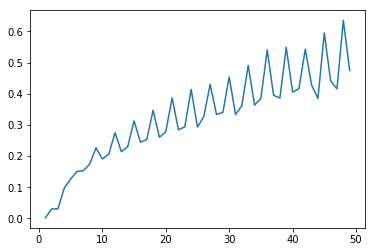

In [15]:
plt.plot(num_recs, np.mean(allctr, axis=0))